# HOUSING PREDICTION (by Pug & Q) 

# กลุ่ม : Housing Prediction

# นาย นราธิป ผ่องนรา  63199130113 <br> นาย ณรงค์กรณ์ อัจฉริยญาติ  63199130344

In [1]:
import numpy as np
import pandas as pd

# Set to show all cols
pd.set_option('display.max_columns', None) 

# Set to show all rows
pd.set_option('display.max_rows', None) 

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading Data

In [2]:
original_housing = pd.read_csv("dataset_lux.csv")
housing = original_housing.copy()
housing.head()

,_id,_sale_price,area,pricepersqm,segment,all_ownership,bathrooms,bedrooms,building_ownership,description,discount_amount,distance,features,floor_number,furniture_option,guaranteed_return,kitchen_option,pet_option,project_features,property_ownership,region_id,sinking_fund,title,location_id,District
0,148488,9200000.0,85.2,107981.2207,UpperClass,NaN,2,2,NaN,NaN,0.0,NaN,NaN,35,1.0,0.0,1.0,1.0,"2,3,5,8,9,11,12,14,16",NaN,23,0.0,Supalai River Resort,28107,Thon Buri
1,149709,3398900.0,27.8,122262.5899,UpperClass,"p_1,p_2,p_4",1,1,NaN,NaN,0.0,NaN,28.0,3,3.0,0.0,2.0,1.0,"3,5,8,9,12,18",NaN,23,500.0,The Key MRT Phetkasem 48,5305,Phasi Charoen
2,149727,5529800.0,50.1,110375.2495,UpperClass,"p_1,p_2,p_4",1,2,NaN,NaN,0.0,NaN,28.0,10,3.0,0.0,2.0,1.0,"3,5,8,9,12,18",NaN,23,500.0,The Key MRT Phetkasem 48,5305,Phasi Charoen
3,149924,2430000.0,24.0,101250.0000,UpperClass,"p_1,p_2,p_4",1,1,NaN,<p>Enjoy the magical living close to the city&...,0.0,NaN,28.0,12,3.0,0.0,2.0,1.0,"3,4,5,8,9,12,18,26,38,48,50,60,66,74",NaN,23,450.0,The Parkland Charan - Pinklao,5359,Bang Phlat
4,149982,2430000.0,24.0,101250.0000,UpperClass,"p_1,p_2,p_4",1,1,NaN,<p>Enjoy the magical living close to the city&...,0.0,0.0,28.0,18,3.0,0.0,2.0,1.0,"3,4,5,8,9,12,18,26,38,48,50,60,66,74",NaN,23,450.0,The Parkland Charan - Pinklao,5359,Bang Phlat


# Features Engeneering

In [3]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

housing['all_ownership']= label_encoder.fit_transform(housing['all_ownership'].astype(str))
housing['all_ownership'].unique()

array([ 0,  5, 13,  9,  2,  8,  3,  1, 10, 12,  7, 11,  4,  6])

In [4]:
housing['project_features']= label_encoder.fit_transform(housing['project_features'].astype(str))
housing['project_features'].unique()

array([ 8, 61, 28, 52, 58, 46, 47, 57,  2, 35, 55, 19, 15, 73, 13, 41, 11,
       39, 54, 42, 51, 59,  4, 56, 40, 64, 29, 32,  6, 37,  5, 34, 25, 69,
       53, 26, 36, 43, 63,  7, 14, 20, 72, 68, 65, 74, 48, 67, 38, 23, 44,
       70, 17,  0, 27,  3,  1, 30, 49, 10, 16, 45, 24, 50, 31, 60, 21, 22,
       18, 66, 62, 33, 12, 71,  9])

In [5]:
housing['property_ownership']= label_encoder.fit_transform(housing['property_ownership'].astype(str))
housing['property_ownership'].unique()

array([4, 3, 1, 0, 2])

In [6]:
housing['features']= label_encoder.fit_transform(housing['features'].astype(str))
housing['features'].unique()

array([4, 2, 3, 0, 1])

In [7]:
housing['location_id'] = label_encoder.fit_transform(housing['location_id'])
housing['location_id'].unique()

array([36, 10, 11,  7, 43, 33, 30, 26,  9, 18, 34, 21, 32, 35, 41, 14,  5,
       44, 23, 15, 28, 12, 20, 24, 45, 13, 37, 17,  1, 42, 25, 19,  2, 47,
       39, 46,  4,  6, 38, 27, 29, 40,  8,  3, 16, 22,  0, 31],
      dtype=int64)

# Data Cleaning

ทำการ Clean ข้อมูล โดยเริ่มจากการสำรวจข้อมูลที่ว่าง (Null) ก่อน จากนั้นเราจะทำการเติมค่าว่างและตัดบาง Feature ที่ไม่จำเป็นออก

In [8]:
housing.isnull().sum()*100/housing.shape[0]

_id                     0.000000
_sale_price             0.000000
area                    0.000000
pricepersqm             0.000000
segment                 0.000000
all_ownership           0.000000
bathrooms               0.000000
bedrooms                0.000000
building_ownership    100.000000
description            81.221719
discount_amount         0.000000
distance               57.466063
features                0.000000
floor_number            0.000000
furniture_option        1.357466
guaranteed_return      11.085973
kitchen_option         52.941176
pet_option             48.416290
project_features        0.000000
property_ownership      0.000000
region_id               0.000000
sinking_fund            2.036199
title                   0.000000
location_id             0.000000
District                0.000000
dtype: float64

จัดการค่าว่างและตรวจสอบ Feature ราคาว่ามีค่าศูนย์หรือไม่

In [9]:
# Drop unneccessary features 
housing.drop(['_id', 'building_ownership', 'description', 'distance', 'title', 'region_id', 'pricepersqm', 'segment', 'District'], axis=1, inplace=True)

In [10]:
# Check zero _sell_price
housing[housing['_sale_price']==0].index

Int64Index([], dtype='int64')

In [11]:
housing['guaranteed_return'] = housing['guaranteed_return'].replace(np.nan, 0).astype(str)
housing['furniture_option'] = housing['furniture_option'].replace(np.nan, 0).astype(str)
housing['sinking_fund'] = housing['sinking_fund'].replace(np.nan, 0)
housing['kitchen_option'] = housing['kitchen_option'].replace(np.nan, 1).astype(str)
housing['pet_option'] = housing['pet_option'].replace(np.nan, 1).astype(str)
housing['all_ownership'] = housing['all_ownership'].replace(np.nan, 0).astype(str)
housing['features'] = housing['features'].replace(np.nan, 0).astype(str)
housing['property_ownership'] = housing['property_ownership'].replace(np.nan, 0).astype(str)

In [12]:
housing.isnull().sum()*100/housing.shape[0]

_sale_price           0.0
area                  0.0
all_ownership         0.0
bathrooms             0.0
bedrooms              0.0
discount_amount       0.0
features              0.0
floor_number          0.0
furniture_option      0.0
guaranteed_return     0.0
kitchen_option        0.0
pet_option            0.0
project_features      0.0
property_ownership    0.0
sinking_fund          0.0
location_id           0.0
dtype: float64

# Visualization

Crossing the Sale Price and Room Area

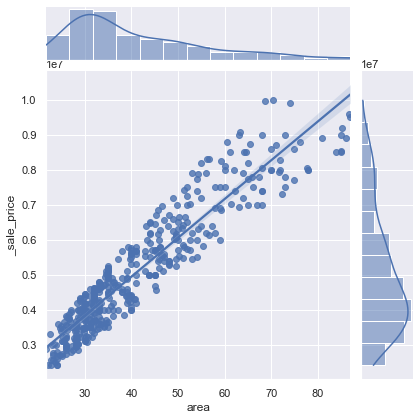

In [13]:
sns.set_theme(color_codes=True)

sns.jointplot(x=housing['area'], y=housing['_sale_price'], data=housing, kind="reg");

จากการเปรียบเทียบ ราคาขาย (_sale_price) กับพื้นที (area) จากกราฟจะเห็นได้ว่าราคาขายมีการกระจุกตัวในช่วงราคาไม่เกิน 5 ล้านบาท ขณะที่พื้นที่มีการกระจุกตัวอยู่ในช่วงไม่เกิน 50 ตารางเมตร โดยราคาขายและพื้นที่มีการกระจายตัวในลักษณะเป็นเชิงเส้น

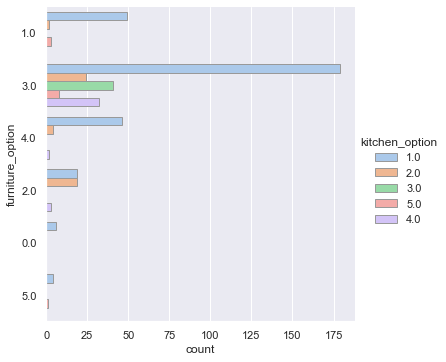

In [14]:
sns.catplot(y="furniture_option", hue="kitchen_option", kind="count",
            palette="pastel", edgecolor=".6",
            data=housing)

จากกราฟเราจะพบว่าจำนวนคอนโดที่ให้ออฟชั่นห้องครัวเป็นออฟชั่น 1 พร้อมกับเฟอร์นิเจอร์ออฟชั่น 3 นั้น มีจำนวนเยอะที่สุด รองลงมาจะเป็นออฟชั่น 1 ที่มาพร้อมกับเฟอร์นิเจอร์ออฟชั่น 4

In [15]:
#Deleting outliers
#train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
# fig, ax = plt.subplots()
# ax.scatter(housing['area'], housing['_sale_price'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('RoomArea', fontsize=13)
# plt.show()

In [16]:
# tips = sns.load_dataset("tips")
# g = sns.FacetGrid(tips, col="time")

# g = sns.PairGrid(housing, hue="bedrooms")
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()

C:\Users\narat\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\narat\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


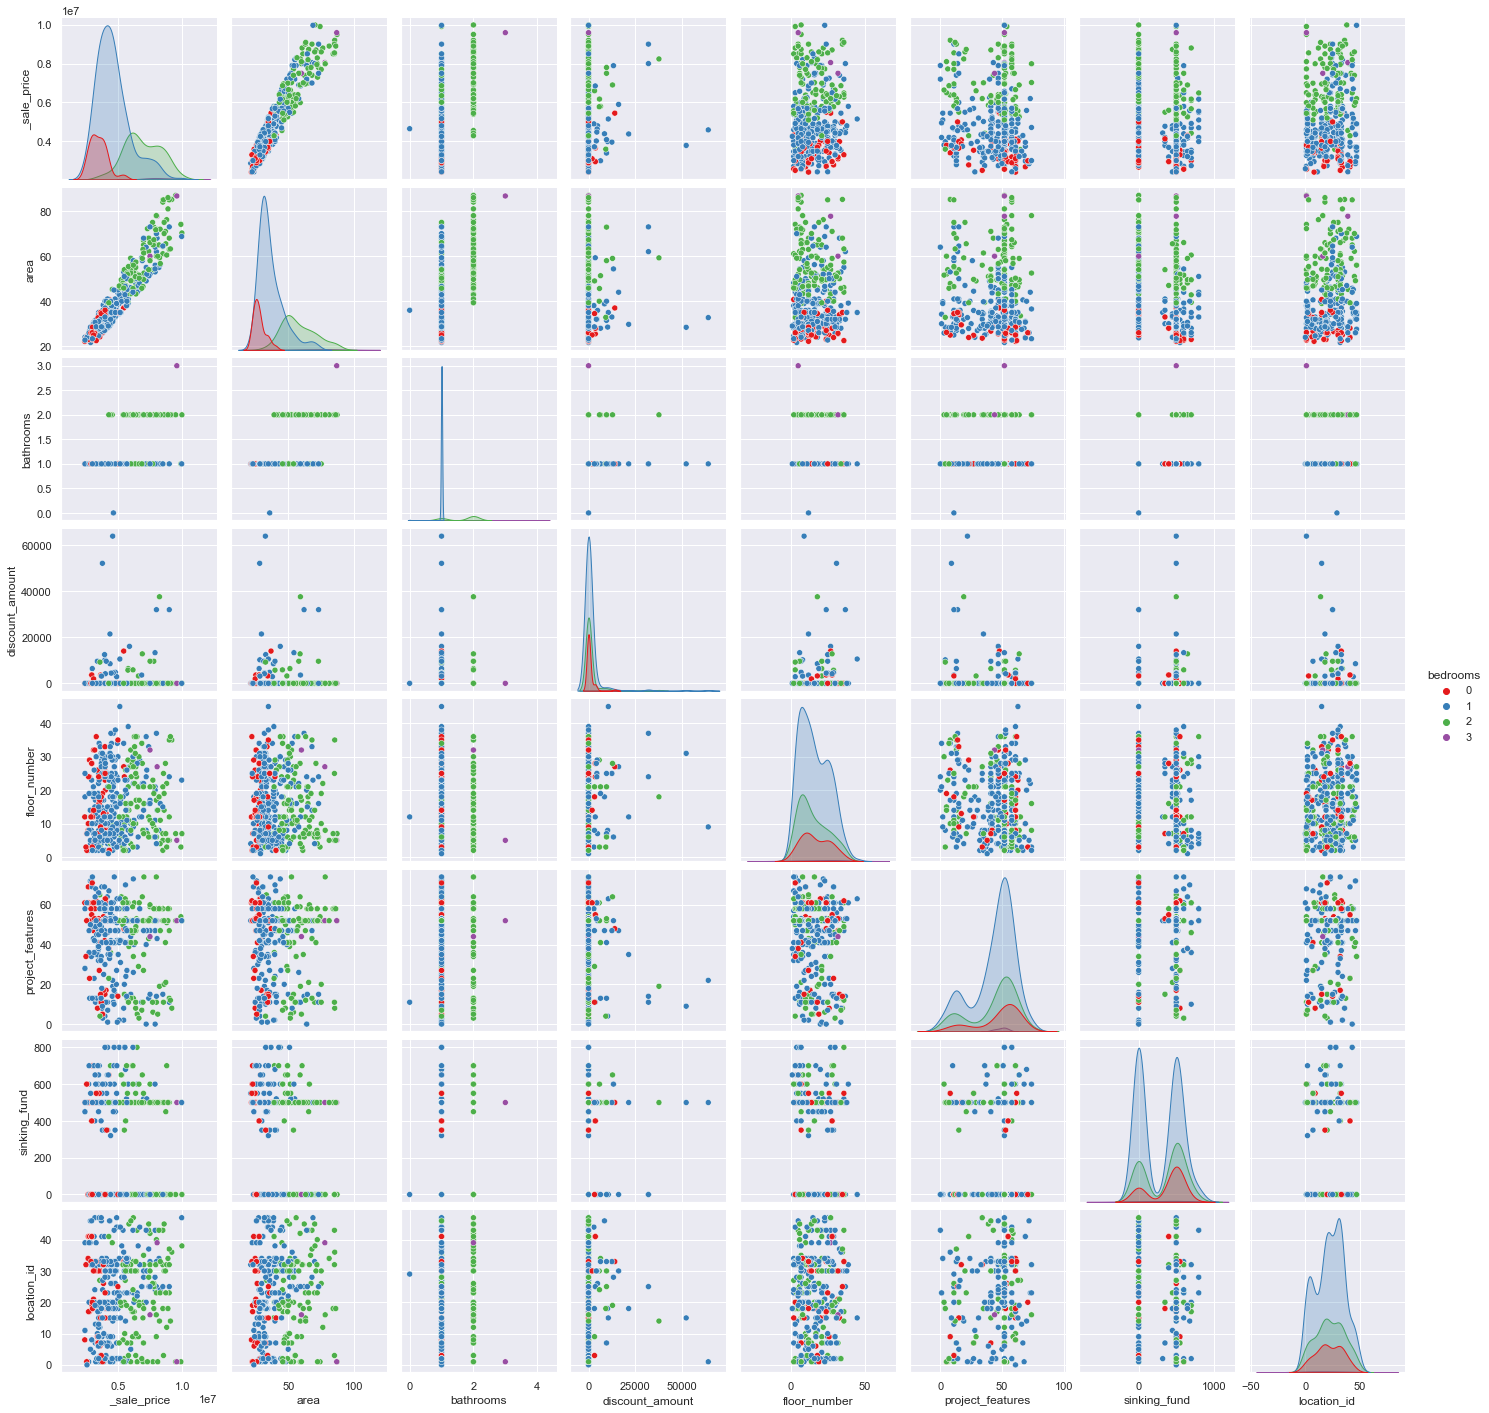

In [17]:
# pairplot with hue 
g = sns.pairplot(housing, hue="bedrooms", palette="Set1", diag_kind="kde", height=2.5)

จากกราฟเราจะได้ว่ายิ่งจำนวนห้องนอนมาก พื้นที่และราคาของคอนโดนั้นก็จะมากด้วยเช่นกัน

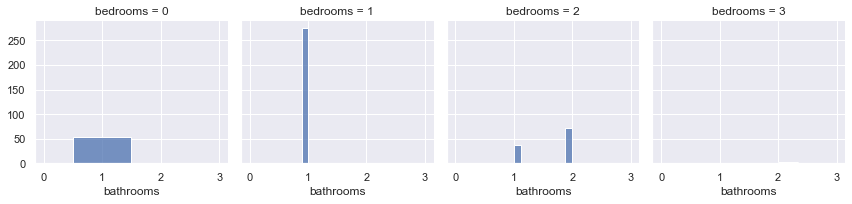

In [18]:
g = sns.FacetGrid(housing, col="bedrooms")
g.map(sns.histplot, "bathrooms")

จากกราฟเราจะเห็นได้ชัดว่าคอนโดส่วนใหญ่จะมี 1 ห้องนอน (bedrooms) และ 1 ห้องน้ำ (bathrooms)

Ranking the location which having the condo

In [19]:
original_housing['location_id'].value_counts().head(5)

17608    38
26553    31
26555    30
9868     28
4153     27
Name: location_id, dtype: int64

Correlation between the features

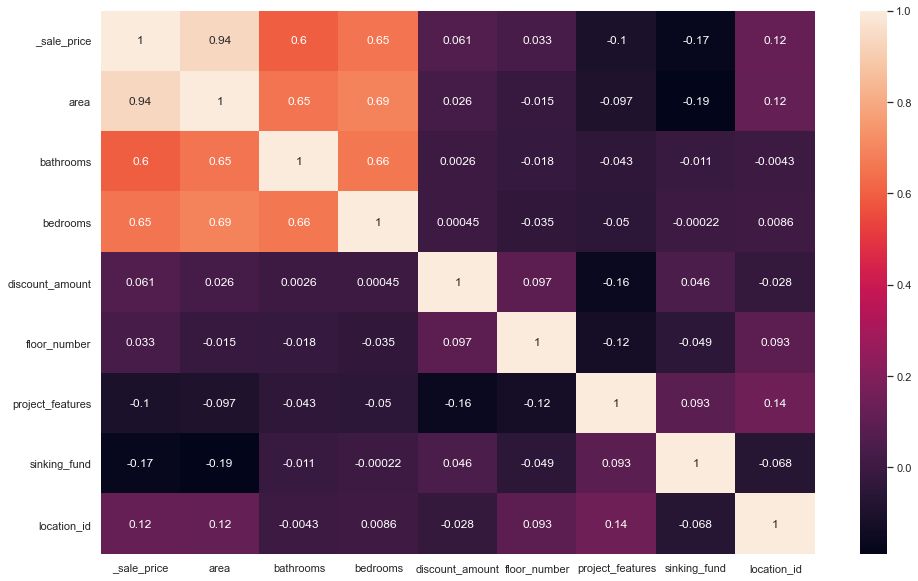

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(housing.corr(), annot = True)
plt.show()

จาก Heatmap เราจะพบว่าที่ Feature ของราคา (_sale_price) นั้นมีความสัมพันธ์กับพื้นที่มากที่สุด รองลงมาได้แก่ จำนวนห้องนอน (bedrooms) และจำนวนห้องน้ำ (bathrooms) แต่ทั้งนี้ จำนวนห้องนอน พื้นที่ (area) และจำนวนห้องน้ำก็มีความสัมพันธ์กันเองระหว่าง Feature มากด้วยเช่นกัน ซึ่งปัญหาในลักษณะนี้เรียกว่า Multicolinearity ซึ่งปัญหานี้จะส่งผลให้โมเดลทำนายผิดพลาดได้ง่ายขึ้น นั่นแสดงว่าแม้ Feature เหล่านี้จะสัมพันธ์กับราคามาก แต่ก็ไม่ได้หมายความว่า Feature ทั้งสามตัวนี้ จะมีความสำคัญ (Importance) กับราคาที่สุด (แตจะมีเพียง 1 Feature จาก 3 Features นี้ที่มีความสำคัญกับราคามากที่สุด) ซึ่งเราจะทำ Feature Selection เพื่อหา Feature Importance ในลำดับถัดไป เพื่อพิสูจน์แนวคิดนี้

# Data Pre-processing

ในที่นี้เราจะทำ Feature Selection เพื่อหา Importance Feature ซึ่งการดำเนินการนี้ถือว่าเป็นการเตรียมข้อมูลให้มีประสิทธิภาพมากยิ่งขึ้น (Preprocessing Data) ก่อนที่จะนำข้อมูลไปสร้างโมเดล ซึ่งนอกจากนี้แล้วการทำ Feature Selection ยังมีประโยชน์ในแง่ของ Computation ในการทำรันโมเดลบน Infrastructure ต่างๆ (หรือพูดง่ายๆว่ามันช่วยให้ประหยัดหน่วยประมวลผลมากขึ้นนั่นเอง) โดยในบทความนี้เราจะนำ Random Forest Classifier ใช้ในการทำ Feature Selection จากนั้นเราจะลำดับ Feature ที่มีความสำคัญที่สุด 4 อันดับแรก เพื่อนำไปใช้ในการ Training (Fit) และ Prediction (ทำนาย) เทียบกับแบบ All Features

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

# To close warning tab
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100) #housing

ทำการตัดข้อมูลส่วนที่เป็น Target ซึ่งในที่นี้ก็คือ ราคา (_sale_price) ออกจาก train และ test มาเก็บไว้ที่ y_train และ y_test ซึ่งหลังจากนี้ train และ test จะไม่มี Feature ของราคาอีกต่อไป เท่ากับว่า train และ test คือ X_train และ X_test นั่นเอง

In [23]:
# To seperate target from the collection
y_train = train.pop('_sale_price')
#X_train = train  

y_test = test.pop('_sale_price')
#X_test = test 

ทำการเปรียบเทียบความสำคัญของ Feature ด้วย Random forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier #, RandomForestRegressor


feat_labels = housing.columns[1:] #housing2

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)


y_train_enc = label_encoder.fit_transform(y_train)

forest.fit(train, y_train_enc)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) area                           0.158862
 2) floor_number                   0.157503
 3) location_id                    0.122113
 4) project_features               0.118371
 5) all_ownership                  0.071484
 6) sinking_fund                   0.069202
 7) furniture_option               0.059949
 8) kitchen_option                 0.052071
 9) property_ownership             0.045397
10) bedrooms                       0.041374
11) features                       0.040305
12) discount_amount                0.029400
13) bathrooms                      0.018475
14) pet_option                     0.007831
15) guaranteed_return              0.007662


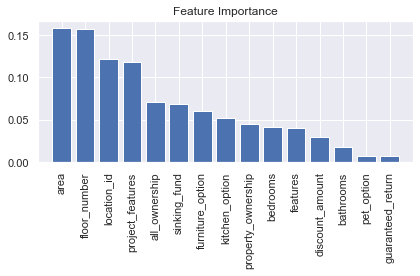

In [60]:
plt.title('Feature Importance')
plt.bar(range(train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

จากลำดับ Importance Feature ที่ลำดับควาสำคัญจากมากไปน้อย จากตรงนี้เราจะเห็นได้ว่าความสำคัญ 4 ลำดับแรก ได้แก่ พื้นที่ (area), ชั้นที่อยู่ของห้องนั้นๆ (floor_number), หมายเลขกำกับพื้นที่ (location_id) และลักษณะของโครงการ (project_features) สอดคล้องกับสมมุติฐานที่เราได้กล่าวไปก่อนหน้านี้ เกี่ยวกับปัญหา Multicolinearity

ต่อมาเราจะทำการสร้างชุดข้อมูล train_imp_f และ test_imp_f เพื่อเก็บเฉพาะข้อมูลของ Feature ที่สำคัญที่สุด 4 อันดับแรก

In [61]:
#housing[housing.columns[1:][[0,1]]].head()
housing[housing.columns[1:][indices[:4]]].head()

,area,floor_number,location_id,project_features
0,85.2,35,36,8
1,27.8,3,10,61
2,50.1,10,10,61
3,24.0,12,11,28
4,24.0,18,11,28


In [62]:
indices[:4]

array([ 0,  6, 14, 11], dtype=int64)

In [63]:
train_imp_f = train[train.columns[indices[:4]]]
test_imp_f = test[test.columns[indices[:4]]]
train_imp_f.head()

,area,floor_number,location_id,project_features
393,40.00,7,38,52
265,34.25,34,23,1
300,50.00,33,21,47
326,81.00,5,34,52
414,58.00,21,30,53


# Modeling

ในที่นี้เราจะทำการสร้างฟังก์ชั่นสำหรับทำ Cross Validation กับข้อมูล train และเรียกใช้งานโมเดล (Modeling) ต่างๆ ก่อน

In [64]:
# Validation function
n_folds = 5

# neg_mean_squared_error, neg_mean_absolute_error
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    mae= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(mae)

In [65]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [66]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [67]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [68]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [69]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, verbosity=0)

In [70]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55)

In [71]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 713.1622 (33.2990)



In [72]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 713.1489 (33.2875)



ทำการเปรียบ Cross Validation Score ด้วย Root Mean Absolute Error (RMAE) พบว่า Lasso กับ ElasticNet นั้นมีค่าไกล้เคียงกันมาก

ทำการสร้างคลาส Averaging Models สำหรับการเฉลี่ยค่า Prediction ของชุดโมเดลที่ได้ Stack มา โดยในที่นี้เราจะทำการ Stack โมเดล และทำการเรียกใช้งานฟังก์ชั่น rmsle_cv เพื่อทำ Cross Validation ให้แต่ละโมเดล จากนั้นนำมาเฉลี่ยและหาส่วนเบี้ยงเบนมาตรฐาน โดยค่าเฉลี่ย Cross validation ของ Stack โมเดลที่ได้มานั้นมีค่าไกล้เคียงกับของ Lasso และ ElasticNet 

In [73]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [74]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 716.5702 (60.7946)



<b>Training และ Prediction

ทำการสร้างฟังก์ชั่นเพื่อเปรียบเทียบความคลาดเคลื่อนด้วย Root Mean Absolute Error และทำการ Fit ข้อมูล All Feature เพื่อเปรียบเทียบความคลาดเคลื่อน ด้วย Averaging Model พบว่าความคลาดเคลื่อนของข้อมูล train นั้นน้อยกว่าข้อมูล test ค่อนข้างมาก

In [75]:
def rmsle(y, y_pred):
    return np.sqrt(mean_absolute_error(y, y_pred))

In [76]:
averaged_models.fit(train.values, y_train)
train_pred = averaged_models.predict(train.values)
avg_pred = averaged_models.predict(test.values)
print(rmsle(y_train, train_pred))
print(rmsle(y_test, avg_pred))

566.7506058266148
697.9563462204039


In [77]:
lasso.fit(train, y_train)
lasso_train_pred = lasso.predict(train)
lasso_pred = lasso.predict(test)
print("train mae:", rmsle(y_train, lasso_train_pred))
print("test mae:", rmsle(y_test, lasso_pred))

train mae: 682.1821536370296
test mae: 706.036198439533


<b>Training และ Prediction ด้วย Importance Features

In [78]:
averaged_models.fit(train_imp_f.values, y_train)
train_pred = averaged_models.predict(train_imp_f.values)
avg_pred = averaged_models.predict(test_imp_f.values)
print(rmsle(y_train, train_pred))
print(rmsle(y_test, avg_pred))

604.8031343308376
665.7830697718476


In [79]:
lasso.fit(train_imp_f, y_train)
lasso_train_pred = lasso.predict(train_imp_f)
lasso_pred = lasso.predict(test_imp_f)
print("train mae:", rmsle(y_train, lasso_train_pred))
print("test mae:", rmsle(y_test, lasso_pred))

train mae: 699.0692368016983
test mae: 705.9454389322007


In [80]:
model_xgb.fit(train_imp_f, y_train)
xgb_train_pred = model_xgb.predict(train_imp_f)
xgb_pred = model_xgb.predict(test_imp_f)
print("train mae:", rmsle(y_train, xgb_train_pred))
print("test mae:", rmsle(y_test, xgb_pred))

train mae: 452.6889934559007
test mae: 693.2285438385246


In [81]:
model_lgb.fit(train_imp_f, y_train)
lgb_train_pred = model_lgb.predict(train_imp_f)
lgb_pred = model_lgb.predict(test_imp_f)
print("train mae:", rmsle(y_train, lgb_train_pred))
print("test mae:", rmsle(y_test, lgb_pred))

train mae: 519.2275242096805
test mae: 668.0730420877418


ทำการ Fit ข้อมูล Importance Feature เพื่อเปรียบเทียบความคลาดเคลื่อน ด้วย Averaging Model, Lasso, XGBoost และ Light Gradient Boosting เพื่อเปรียบเทียบความคลาดเคลื่อนด้วย Root Mean Absolute Error ซึ่งพบว่า XGBoost นั้นมีความคลาดเคลื่อนกับข้อมูล train น้อยที่สุด ซึ่งหากคิดเป็นความคลาดเคลื่อนในหน่วยราคา (บาท) นั้น ความคลาดเคลื่อนจะอยู่ที่ประมาณ 205,000 บาท ขณะที่ Averaging Model นั้นมีความคลาดเคลื่อนกับข้อมูล test น้อยที่สุด ซึ่งหากคิดเป็นความคลาดเคลื่อนในหน่วยราคา (บาท) นั้น ความคลาดเคลื่อนจะอยู่ที่ประมาณ 443,000 บาท

In [82]:
GBoost.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 15,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 5,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

ต่อมาเราจะลอง Predict ข้อมูลด้วยโมเดลที่ Fit ข้อมูลเฉพาะจาก Importance Feature โดยการสุ่มข้อมูล พื้นที่ (area), ชั้นที่อยู่ของห้องนั้นๆ (floor_number), หมายเลขกำกับพื้นที่ (location_id) และลักษณะของโครงการ (project_features) ซึ่งเป็น Importance Feature จำนวน 4 ลำดับแรก เข้าไปยังโมเดลต่างๆ ดังนี้

In [83]:
housing.head(10)

,_sale_price,area,all_ownership,bathrooms,bedrooms,discount_amount,features,floor_number,furniture_option,guaranteed_return,kitchen_option,pet_option,project_features,property_ownership,sinking_fund,location_id
0,9200000.0,85.20,0,2,2,0.00,4,35,1.0,0.0,1.0,1.0,8,4,0.0,36
1,3398900.0,27.80,5,1,1,0.00,2,3,3.0,0.0,2.0,1.0,61,4,500.0,10
2,5529800.0,50.10,5,1,2,0.00,2,10,3.0,0.0,2.0,1.0,61,4,500.0,10
3,2430000.0,24.00,5,1,1,0.00,2,12,3.0,0.0,2.0,1.0,28,4,450.0,11
4,2430000.0,24.00,5,1,1,0.00,2,18,3.0,0.0,2.0,1.0,28,4,450.0,11
5,3790000.0,30.00,13,1,1,0.00,4,27,1.0,0.0,1.0,1.0,52,3,350.0,7
6,8500000.0,85.00,9,2,2,0.00,2,5,3.0,0.0,1.0,1.0,58,1,0.0,43
7,4190000.0,33.50,9,1,1,0.00,2,4,3.0,0.0,3.0,1.0,46,1,0.0,33
8,5670000.0,41.00,9,1,1,0.00,2,19,3.0,0.0,3.0,1.0,47,1,520.0,30
9,4800000.0,35.95,9,1,1,4801.95,2,7,3.0,0.0,1.0,1.0,52,1,0.0,26


In [90]:
lasso.predict([[85.2, 35, 8, 36]])

array([10202784.80360578])

In [85]:
lasso.predict([[84, 3, 28, 45]])

array([9811313.84765647])

In [86]:
averaged_models.predict(np.array([[85.2, 35, 8, 36]]))

array([9801961.55286619])

In [87]:
model_xgb.predict(np.array([[85.2, 35, 8, 36]]))

array([9386888.], dtype=float32)

In [88]:
model_lgb.predict(np.array([[35, 10, 52, 11]]))

array([4444884.07371432])

ทำการโหลดไฟล์โมเดล เพื่อนำไป Deploy ด้วย FastAPI

In [91]:
import joblib

# save the model to disk

filename = 'avg_model.h5'
joblib.dump(averaged_models, filename)
 
# load the model from disk

loaded_model = joblib.load(filename)
result = loaded_model.predict([[85.2, 35, 8, 36]])
print(result)

[9801961.55286619]


In [92]:
filename = 'lasso_model.h5'
joblib.dump(lasso, filename)
 
# load the model from disk

loaded_model = joblib.load(filename)
result = loaded_model.predict([[85.2, 35, 8, 36]])
print(result)

[10202784.80360578]
